## This project explores whether a person will accept a recomended coupon in different driving scenarios. The dataset was collected via a survey on Amazon mechanical turk where participants were present with hypothetical driving driving situation and asked they could accept a coupon.

## The objective of this project is to predict the likelihood of a coupon acceptance in various scenarios.
### understand the influence of factors like destination,time,weather on decision making

## Importing necessary libraries
### pandas & numpy: Are essential data manipulation libraries in python.Pandas is used for data handling and analysis and numpy is used for numerical analysis.
### matplolib & seaborn : These libarries are used for data visualization.
### OneHotEncoder : This encoder is uesed for transform categorical data into numerical form which is essential for machine lerning algorithm
### StandardScaler : It rescales the data to have a mean of 0 and a standard deviation of 1
### train_test_split : one of the most important process in data preprocessing involves splitting the data set into train and test set. By doing this we can enhance the performance of our model and hence provide better predictability
### Select KBest : this feature selection tool help to select the top k features based on statical test
### warnings : This can make the analysis smoother and the results easier to interpret without irrelevant warning messages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2, f_classif
import warnings
warnings.filterwarnings('ignore')

## Load the daset into a DataFrame

## Data over view
### Source : Amazon Mechanical Turk
### Features : 25 columns, including:
### - eontextual factors : Destination, weather, time
### - personal factors : passenger type, age, gender, martial status
### - coupon details : type, expiration
### - target : whether the coupon was accepted(YES/NO)

In [2]:
df = pd.read_csv("C:\\Users\\sanut\\Downloads\\vehicle-coupon-recommendation.csv")
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


## Displaying the first few rows of the dataset proviging an initial view of the structure and any potential issue at a glance

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Displaying the last fwe rows of the dataset

In [4]:
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


## Identifying the dimensions of the dataset which is useful for planning analysis and preprocessing

In [5]:
df.shape

(12684, 26)

## Ideentifying the columns tyoe and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Checking for missing values accross columns , missig values can impact model performance

In [7]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Replacing the missing values in ecah columns.
### here columns with missing values defined in a list and the for loop filll the misssing values in the columns with mode for each columns 
### mode function used because missing values are categorical data

In [8]:
null_columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']## Defines s list of columns with missing values
for col in null_columns: ## the for loop filll the misssing values in the columns with mode of each columns 
#(mode function used because missing values are categorical data)
    value = df[col].mode()[0]
    df[col].fillna(value,inplace = True)

## Renaming columns
### here the column Y renamed to Coupon_Accepted making the target variable clear

In [9]:
df.rename(columns={'Y':'Coupon_Accepted'},inplace=True)

## Corecting column name to ensure consisty and readability

In [10]:
df.rename(columns={'maritalStatus':'MartialStatus'},inplace=True)

## Dropping irrelevant columns
### Removing the column name Car due to having higher number of null values of 12576,which colud affect data quality droping it is the relevant step to maintain data focus.Columns with large number of missing data lacks sufficient information to be useful for predicting model

In [11]:
df.drop(columns = 'car',inplace = True)

In [12]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
MartialStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Coupon_Accepted         0
dtype: int64

## Data Summarization
### provides sattistical summary for numerical columns and give insights into data distributon

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Coupon_Accepted,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


## Extends the summary to include categorical data as well

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
destination,12684,3,No Urgent Place,6283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passanger,12684,4,Alone,7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,12684,3,Sunny,10069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,12684.0,NaN,NaN,NaN,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
time,12684,5,6PM,3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupon,12684,5,Coffee House,3996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expiration,12684,2,1d,7091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,12684,2,Female,6511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,12684,8,21,2653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MartialStatus,12684,5,Married partner,5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for duplicate rows
### by identifying and removing duplicates ensure htat each data represents unique customer behavior making insights more reliable

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool

## Outlier Detection And  Method Selection

In [16]:
df['temperature'].skew()

-0.6433896186567546

### skewness

### Skewness is approximately 0. It indicates symmetrical or normal distribution

### Graphical representation of outlier detection of numerical columns

<Axes: >

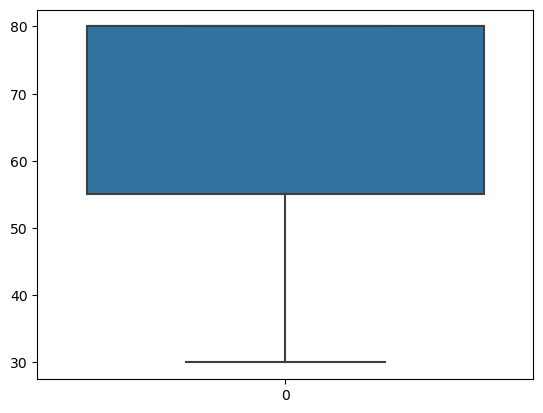

In [17]:
sns.boxplot(df['temperature'])

### IQR method

In [18]:
q1=df['temperature'].quantile(0.25)
q3=df['temperature'].quantile(0.75)
iqr = q3 - q1
lower_level = q1 - 1.5 * iqr
upper_level = q3 + 1.5 * iqr
outliers = df[(df['temperature'] < lower_level) | (df['temperature'] > upper_level)]
outliers

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,MartialStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Accepted


### Z-Score Method

In [19]:
upper_limit = df['temperature'].mean() + 3 * df['temperature'].std()
lower_limit = df['temperature'].mean() - 3 * df['temperature'].std()
outliers = df[(df['temperature'] < lower_limit) | (df['temperature'] > upper_limit)]
outliers

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,MartialStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Accepted


### Considered both IQR(inter quartile range) and Z-score method to identify outliers. IQR & Z-score detect none. Means that most data points falls within a typical range for normal distribution. There is no extreme value inm this dataset according to z-sore & iqr method. Because the data distribution is symmetrical

Text(0.5, 1.0, 'Distribution of target class')

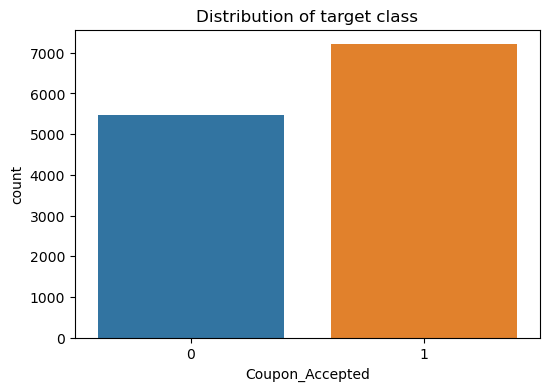

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Coupon_Accepted',data=df)
plt.title('Distribution of target class')

Text(0, 0.5, 'Coupon Acceptance')

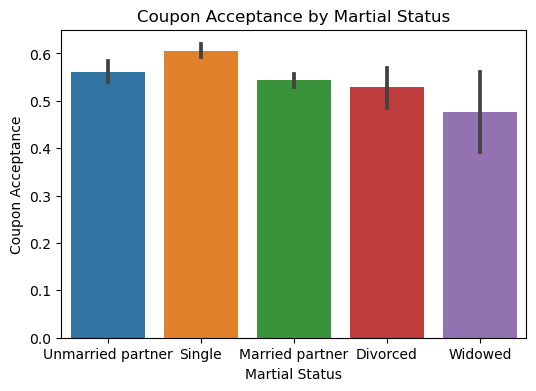

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='MartialStatus',y='Coupon_Accepted',data=df)
plt.title('Coupon Acceptance by Martial Status')
plt.xlabel('Martial Status')
plt.ylabel('Coupon Acceptance')

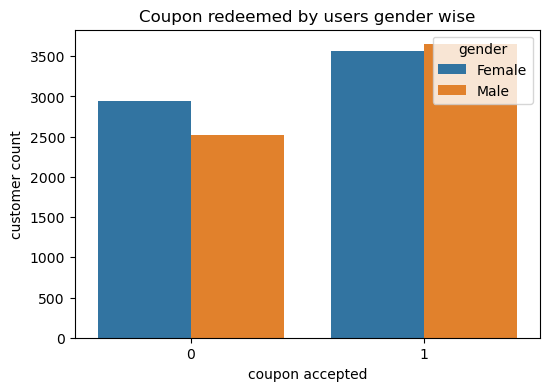

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Coupon_Accepted',hue='gender',data=df)
plt.title('Coupon redeemed by users gender wise')
plt.xlabel('coupon accepted')
plt.ylabel('customer count')
plt.show()

Text(0, 0.5, 'Accaptance count')

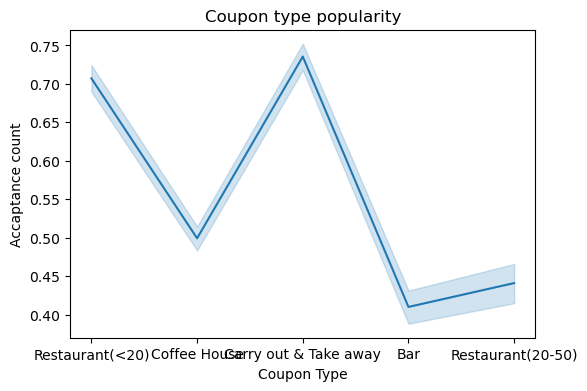

In [23]:
plt.figure(figsize=(6,4))
sns.lineplot(x='coupon',y='Coupon_Accepted',data=df)
plt.title('Coupon type popularity')
plt.xlabel('Coupon Type')
plt.ylabel('Accaptance count')

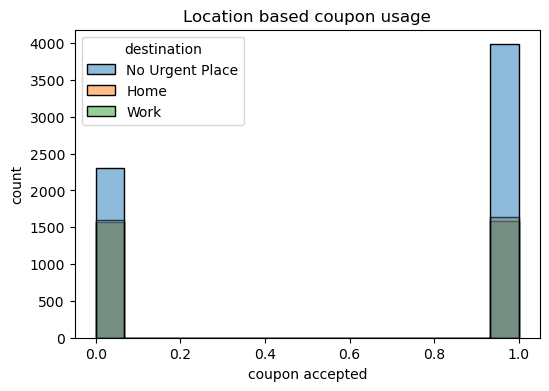

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(x='Coupon_Accepted',hue='destination',data=df)
plt.title('Location based coupon usage')
plt.xlabel('coupon accepted')
plt.ylabel('count')
plt.show()

### The chart shows that people more likely to accept coupon when the destination is no urgent places compared to home and work 

Text(0.5, 1.0, 'Pairwise relationship of distance with coupon acceptance')

<Figure size 600x400 with 0 Axes>

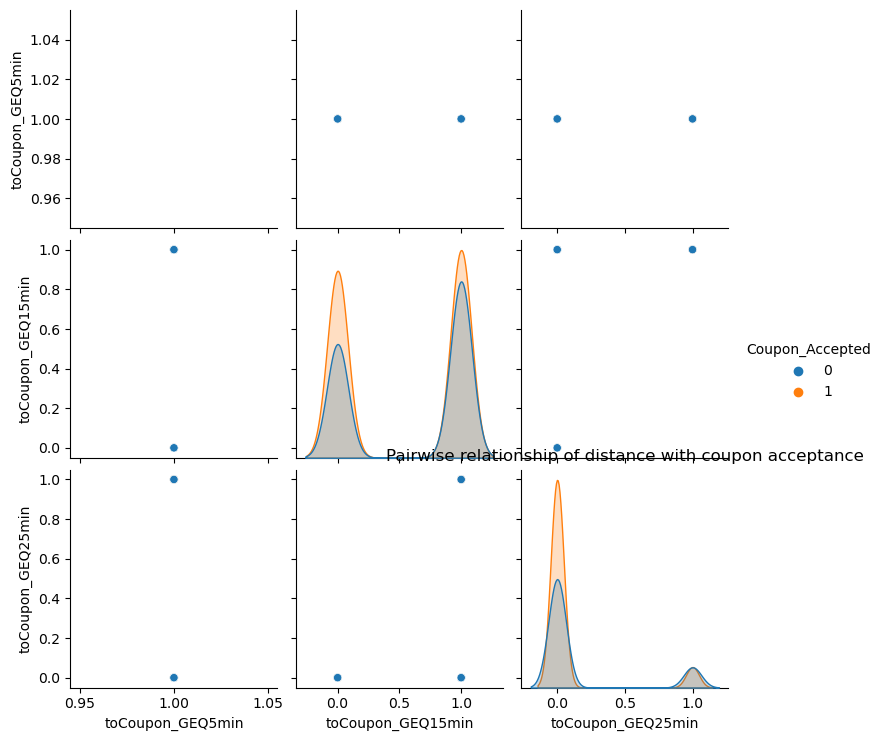

In [25]:
plt.figure(figsize=(6,4))
sns.pairplot(df,vars=['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],hue='Coupon_Accepted')
plt.title('Pairwise relationship of distance with coupon acceptance')

In [26]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
data=df[numeric_columns]
correlation=data.corr()
correlation

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Accepted
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Coupon_Accepted,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


Text(0.5, 1.0, 'Correlation of numeric columns')

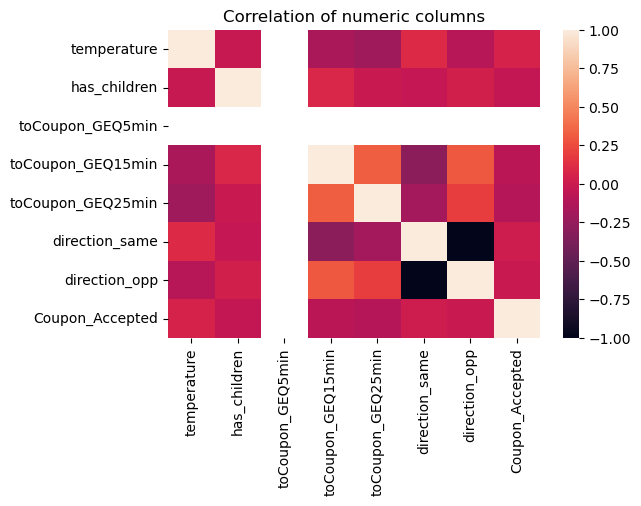

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation)
plt.title('Correlation of numeric columns')

## Encoding categorical features
### dataset contains several categorical variables. These variables needs to transform into a format usable for prediction model. To handle this using One Hot Encoder for converting categorical variables into numerical form (0 and 1)

In [28]:
categorical_data = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse = False,handle_unknown='ignore',drop='first')
encoded = encoder.fit_transform(df[categorical_data])
encoded = pd.DataFrame(encoded,columns =encoder.get_feature_names_out(categorical_data))
data = pd.concat([df.drop(columns=categorical_data),encoded],axis=1)
data

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_Accepted,destination_No Urgent Place,destination_Work,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,0,0,0,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80,1,1,0,0,0,1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,1,1,1,0,0,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80,1,1,1,0,0,1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,1,1,1,0,0,1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,0,1,0,0,1,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12680,55,0,1,0,0,0,1,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12681,30,0,1,0,0,1,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12682,30,0,1,1,1,0,1,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA(Princcipal Component Analysis) Implimentation

### After encoging the dataset with One Hot Encoder the features increases. The introduction of multiple binary column for each categorical variable increses the dimensionality. High dimensional data can make machine learning model less efficient and cause over fitting. To address these challenge PCA dimensionality reduction technique is using. PCA transform dataset into smaller set of features while retaining most of the variance in the original data

In [29]:
from sklearn.decomposition import PCA
data.drop(columns=['Coupon_Accepted'],axis=1)## Target variable dropping before applying PCA ensuring dimensionality reduction only focus on indipendent features
pca= PCA(15)## specifying to select only 15 pca components
reduced_data = pca.fit_transform(data)
reduced_data = pd.DataFrame(reduced_data)## converting the reduced data into a dataset
reduced_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8.292376,-0.755076,-0.020896,0.508994,1.290335,-0.367470,-0.750672,-0.317938,0.550311,-0.516902,-0.271684,0.212761,0.366261,0.696661,-0.845346
1,-16.709626,-0.719298,-0.107402,1.021562,0.945202,-0.080464,0.109228,1.074640,0.151111,-0.580659,-0.011622,0.288931,-0.064805,0.324190,-0.390767
2,-16.700541,-0.783694,-0.079719,1.039336,0.729199,-0.441674,-0.581153,0.047706,0.380122,-0.437506,0.231750,-0.431288,-0.500547,-0.039174,0.431433
3,-16.706394,-1.002731,-0.104742,1.381369,0.561486,-0.219670,0.049143,1.008946,0.193283,-0.557105,0.059009,0.189493,-0.163968,0.165227,-0.161551
4,-16.703176,-0.963756,-0.074806,1.358863,0.574585,-0.303898,-0.151412,0.607836,0.315305,-0.538331,-0.064698,0.342282,0.469988,-0.139113,-0.323886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,8.306190,0.898001,0.905010,-0.753477,0.934921,1.304665,-0.795264,-0.160065,0.052222,0.000315,-0.848553,-0.419909,-0.008634,-0.602038,-0.093844
12680,8.316967,1.051659,0.942481,0.392680,-0.371502,0.713946,-0.992806,-0.472404,0.113129,-0.062049,-1.011213,0.081790,-0.038190,-0.215695,-0.438735
12681,33.313080,1.594574,0.826333,0.161697,0.088636,1.204516,-0.302238,0.633850,-0.138005,-0.162572,-1.047239,0.769666,-0.122583,-0.071055,-0.783854
12682,33.328995,0.997690,0.814879,1.049994,-0.893018,0.797428,-0.534552,0.189424,0.037358,-0.022336,-0.907556,-0.433755,0.178093,-0.099891,-0.672739


In [30]:
reduced_data.shape

(12684, 15)

## Splitting Features and Target Variables

In [31]:
X = reduced_data
y = data['Coupon_Accepted']

## Splitting data for training and testing 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Random Forest Classifier Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1001  127]
 [  60 1349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1128
           1       0.91      0.96      0.94      1409

    accuracy                           0.93      2537
   macro avg       0.93      0.92      0.92      2537
weighted avg       0.93      0.93      0.93      2537



## Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1010  118]
 [ 127 1282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1128
           1       0.92      0.91      0.91      1409

    accuracy                           0.90      2537
   macro avg       0.90      0.90      0.90      2537
weighted avg       0.90      0.90      0.90      2537



## Support Vector Classification Model

In [35]:
from sklearn.svm import SVC
svc=SVC(class_weight='balanced')
svc.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1010  118]
 [ 127 1282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1128
           1       0.92      0.91      0.91      1409

    accuracy                           0.90      2537
   macro avg       0.90      0.90      0.90      2537
weighted avg       0.90      0.90      0.90      2537



## Decision Tree Classification Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1010  118]
 [ 127 1282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1128
           1       0.92      0.91      0.91      1409

    accuracy                           0.90      2537
   macro avg       0.90      0.90      0.90      2537
weighted avg       0.90      0.90      0.90      2537



## K-Nearest Neighbor Classification Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
naive = KNeighborsClassifier()
naive.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1010  118]
 [ 127 1282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1128
           1       0.92      0.91      0.91      1409

    accuracy                           0.90      2537
   macro avg       0.90      0.90      0.90      2537
weighted avg       0.90      0.90      0.90      2537



## Gradient Boosting Classification Model

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 989  139]
 [  77 1332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1128
           1       0.91      0.95      0.93      1409

    accuracy                           0.91      2537
   macro avg       0.92      0.91      0.91      2537
weighted avg       0.92      0.91      0.91      2537



### Based on the evaluation metrix we are selecting Random Forest because Random Forest achieves an accuracy of 93% which is highest among all the model. Random Forest achieves recalll of 96% for class 1 means it correctly identifies a large propotion tru positive. Precision, recall, f1-score are high across both classes. Classs-0: precision:0.94,recall:0.89,f1-score:0.91 and for class-1: precision:0.91,recall:0.96,and f1-score:0.94 this indicateas the model perform well in distinguishing both classes. Random Forest shows fewer misclassification of clas-0 compared to Gradient Boosting.